In [1]:
import pandas as pd
import numpy as np
from luwiji.pandas import illustration
df = pd.read_csv("Maximum by Adjie.csv")
df.head(201)

ModuleNotFoundError: No module named 'luwiji'

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
X = df.values[:,0:10].astype(float)
y = LabelBinarizer().fit_transform(df.Category)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 90):
      print("\n Sudah dapat akurasi 100%")
      self.model.stop_training = True
callbacks = myCallback()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(300,10)),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300, 1500)         16500     
_________________________________________________________________
dense_9 (Dense)              (None, 300, 1500)         2251500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 1500)         0         
_________________________________________________________________
dense_10 (Dense)             (None, 300, 1500)         2251500   
_________________________________________________________________
dropout_5 (Dropout)          (None, 300, 1500)         0         
_________________________________________________________________
dense_11 (Dense)             (None, 300, 3)            4503      
Total params: 4,524,003
Trainable params: 4,524,003
Non-trainable params: 0
____________________________________________

In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=25, verbose=1, validation_split=0.33, callbacks=[callbacks])
model.evaluate(X_train, y_train, verbose=2)
model.evaluate(X_test, y_test, verbose=2)
model.evaluate(scaler.transform(X), y, verbose=2)

Epoch 1/10
7/7 [==============================] - 1s 97ms/step - loss: 3.8998 - accuracy: 0.5416 - val_loss: 3.3053 - val_accuracy: 0.6375
Epoch 2/10
7/7 [==============================] - 1s 87ms/step - loss: 3.1764 - accuracy: 0.6148 - val_loss: 2.9283 - val_accuracy: 0.6375
Epoch 3/10
7/7 [==============================] - 0s 66ms/step - loss: 2.7129 - accuracy: 0.7032 - val_loss: 2.5812 - val_accuracy: 0.6875
Epoch 4/10
7/7 [==============================] - 0s 68ms/step - loss: 2.2616 - accuracy: 0.7727 - val_loss: 2.3040 - val_accuracy: 0.6375
Epoch 5/10
7/7 [==============================] - 1s 95ms/step - loss: 1.9030 - accuracy: 0.8025 - val_loss: 1.9382 - val_accuracy: 0.6750
Epoch 6/10
7/7 [==============================] - 0s 67ms/step - loss: 1.7268 - accuracy: 0.7564 - val_loss: 1.7186 - val_accuracy: 0.7500
Epoch 7/10
7/7 [==============================] - 0s 66ms/step - loss: 1.5283 - accuracy: 0.8181 - val_loss: 1.9733 - val_accuracy: 0.6875
Epoch 8/10
7/7 [===========

[1.1618191003799438, 0.8366666436195374]

**PCA**

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train)

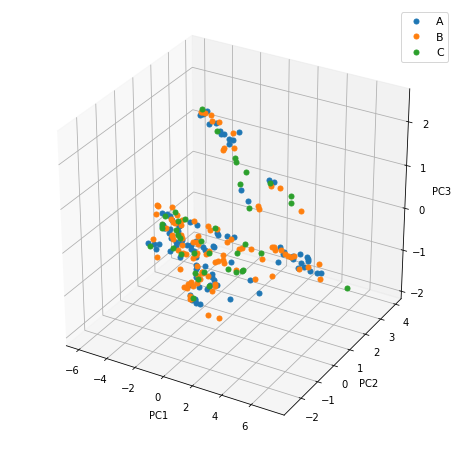

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11
ax.plot(X_train[0:100,0], X_train[0:100,1], X_train[0:100,2], 'o', markersize=5, label='A')
ax.plot(X_train[101:200,0], X_train[101:200,1], X_train[101:200,2], 'o', markersize=5, label='B')
ax.plot(X_train[201:300,0], X_train[201:300,1], X_train[201:300,2], 'o', markersize=5, label='C')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='upper right')

plt.show()

In [60]:
X_train[0:100,1]

array([-1.55371494e+00,  8.81917556e-03, -4.22967074e-03,  7.00496898e-01,
        5.93123223e-01, -8.92892225e-01,  1.28917900e+00,  5.41849736e-01,
        7.15350055e-01,  1.81714804e-01, -2.14624403e+00,  2.59458113e+00,
       -1.08323940e+00, -3.68021333e-01,  2.81881130e-01, -7.18915747e-01,
       -1.05989125e+00, -2.11607149e+00, -3.52197292e-01, -6.27926948e-01,
        3.25738297e-01, -4.37565258e-01, -7.80281130e-03,  1.66799394e+00,
       -9.47313442e-01,  6.94034998e-01,  8.68878673e-01,  1.50136584e-01,
        9.24049687e-01,  5.21552394e-01, -9.83580344e-01,  8.52327708e-01,
       -1.01583911e+00,  2.99582744e-01,  1.73585592e+00,  7.23574703e-01,
        2.00042299e+00, -1.84488528e+00, -1.28432938e+00, -2.29673379e+00,
       -8.89122870e-01, -1.27145859e+00,  1.84150370e-03,  1.16667703e+00,
       -7.99576561e-01,  1.20913842e+00, -7.72467028e-02,  8.21890326e-01,
        6.66438448e-01,  2.23906555e+00,  1.16076151e+00,  1.36819985e+00,
       -1.81935197e+00,  

In [63]:
X_train[0:100,2]

IndexError: ignored

<Figure size 432x288 with 0 Axes>

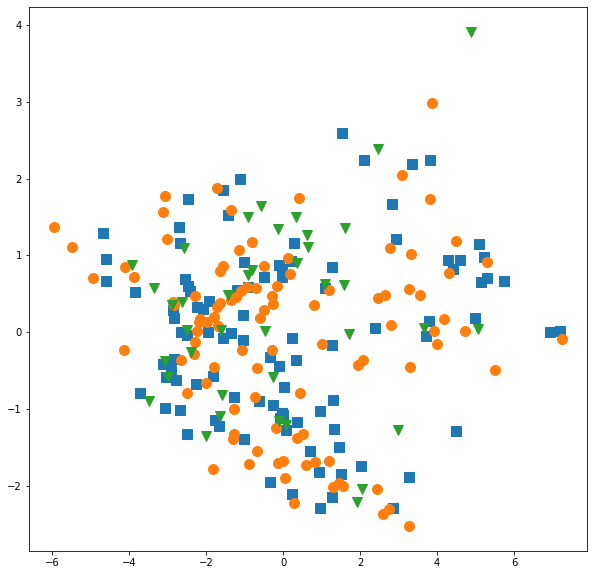

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(X_train[0:100,0], X_train[0:100,1], 's', markersize=10, label='A')
plt.plot(X_train[101:200,0], X_train[101:200,1], 'o', markersize=10, label='B')
plt.plot(X_train[201:300,0], X_train[201:300,1], 'v', markersize=10, label='C')
plt.show()


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train=pca.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(X_train[0:100,0], X_train[0:100,1], X_train[0:100,2],'s', markersize=10, label='A')
plt.plot(X_train[101:200,0], X_train[101:200,1], X_train[0:100,2], 'o', markersize=10, label='B')
plt.plot(X_train[201:300,0], X_train[201:300,1], X_train[0:100,2],'v', markersize=10, label='C')
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.manifold import TSNE
tsne= TSNE(n_components=3,n_iter=3000)#change perplexity for better result
X_train=tsne.fit_transform(X_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11
ax.plot(X_train[0:100,0], X_train[0:100,1], X_train[0:100,2], 'o', markersize=5, label='A')
ax.plot(X_train[101:200,0], X_train[101:200,1], X_train[101:200,2], 'o', markersize=5, label='B')
ax.plot(X_train[201:300,0], X_train[201:300,1], X_train[201:300,2], 'o', markersize=2.5, label='C')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='upper right')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
X_train=pca.fit_transform(X_train)

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(X_train[0:100,0], X_train[0:100,1], X_train[0:100,2], 'o', markersize=5, label='A')
plt.plot(X_train[101:200,0], X_train[101:200,1], X_train[101:200,2], 'o', markersize=5, label='B')
plt.plot(X_train[201:300,0], X_train[201:300,1], X_train[201:300,2], 'o', markersize=5, label='C')
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Kakao Dataset",fontsize=20)
colors = ['r', 'g']

plt.show()

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

plt.legend(targets,prop={'size': 15})

**Radar Plot** 

array([[2419.875 ,  663.1875, 2285.4375, ..., 1860.    ,   28.3   ,
          45.23  ],
       [2496.75  ,  682.875 , 2418.375 , ..., 1949.0625,   29.71  ,
          46.06  ],
       [2682.1875,  860.8125, 2708.4375, ..., 2124.5625,   30.54  ,
          48.57  ],
       ...,
       [2377.125 ,  797.625 , 2112.5625, ..., 1586.0625,   33.38  ,
          40.55  ],
       [2218.6875,  749.8125, 1874.0625, ..., 1445.0625,   30.24  ,
          46.61  ],
       [2264.625 ,  680.4375, 1930.5   , ..., 1566.    ,   29.81  ,
          45.11  ]])

ValueError: ignored

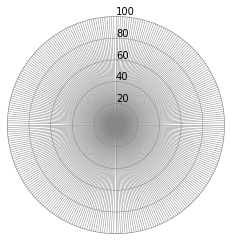

In [75]:
# Plots a radar chart.

from math import pi
import matplotlib.pyplot as plt


# Set data
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
X = df.values[:,0:10].astype(np.float64)
y = LabelBinarizer().fit_transform(df.Category)
X = np.array(X)
y = np.array(y)
N = len(X)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
y += y[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax = plt.subplot(111, polar=True)


# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)


# Set position of y-labels
ax.set_rlabel_position(0)


# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])


# Plot data
ax.plot(x_as, y, linewidth=0, linestyle='solid', zorder=3)

# Fill area
ax.fill(x_as, y, 'b', alpha=0.3)


# Set axes limits
plt.ylim(0, 100)


# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()

array([[2419.875 ,  663.1875, 2285.4375, ..., 1860.    ,   28.3   ,
          45.23  ],
       [2496.75  ,  682.875 , 2418.375 , ..., 1949.0625,   29.71  ,
          46.06  ],
       [2682.1875,  860.8125, 2708.4375, ..., 2124.5625,   30.54  ,
          48.57  ],
       ...,
       [2377.125 ,  797.625 , 2112.5625, ..., 1586.0625,   33.38  ,
          40.55  ],
       [2218.6875,  749.8125, 1874.0625, ..., 1445.0625,   30.24  ,
          46.61  ],
       [2264.625 ,  680.4375, 1930.5   , ..., 1566.    ,   29.81  ,
          45.11  ]])